# Entrance Challenge: When Will the Sakura Bloom?

***

**Name：AI - 16**

**Submission Date：1 Dec, 2017**

***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings 
warnings.simplefilter('ignore')

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2017 using the Japanese Meteorological Agency website (気象庁).

In [5]:
sakura_df = pd.read_csv('sakura_withbloom.csv')
print(sakura_df.loc[sakura_df['bloom'] == 1].loc[:, ['year', 'month', 'day', 'bloom']])

       year  month  day  bloom
90     1961      4    1      1
455    1962      4    1      1
820    1963      4    1      1
1187   1964      4    2      1
1552   1965      4    2      1
1904   1966      3   20      1
2279   1967      3   30      1
2644   1968      3   29      1
3017   1969      4    6      1
3383   1970      4    7      1
3740   1971      3   30      1
4104   1972      3   28      1
4472   1973      3   31      1
4839   1974      4    2      1
5200   1975      3   29      1
5559   1976      3   22      1
5924   1977      3   22      1
6298   1978      3   31      1
6655   1979      3   23      1
7029   1980      3   31      1
7389   1981      3   26      1
7751   1982      3   23      1
8124   1983      3   31      1
8501   1984      4   11      1
8858   1985      4    3      1
9223   1986      4    3      1
9577   1987      3   23      1
9953   1988      4    2      1
10305  1989      3   20      1
10670  1990      3   20      1
11045  1991      3   30      1
11405  1

All the sakura blooming date (桜の開花日) for Tokyo from 1961 to 2017 using the Japanese Meteorological Agency website (気象庁) is shown here. The first column is just the serial number of the respective rows in the dataframe.

***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.

In [22]:
train_df = sakura_df
test_years = np.array([1966, 1971, 1985, 1994, 2008])
for i in test_years:
    train_df = train_df[train_df['year'] != i]
test_df = sakura_df
test_df = test_df[(test_df['year'] == 1966) | (test_df['year'] == 1971) | (test_df['year'] == 1985) | (test_df['year'] == 1994) | (test_df['year'] == 2008)]

52

The main dataframe was divided into training and test dataframe for convenience.

Tmean =  638.355769231


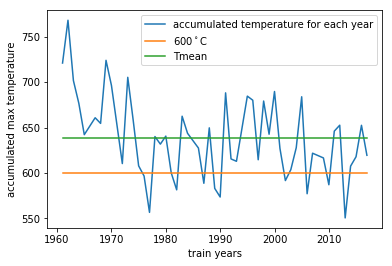

In [7]:
accumulated_temp = []
tmax = 0
train_years = train_df.year.unique()
test_years = test_df.year.unique()
sakura_years = sakura_df.year.unique()

p = range(0,52)
for k in p:
    for i in train_df[train_df.year == train_years[k]].serial:
        max_temp = train_df.get_value(i+31, 'max temp')
        tmax = tmax + max_temp
        if(train_df.get_value(i+31, 'bloom') == 1):
            accumulated_temp.append(tmax)
            break
    tmax = 0

Tmean = np.mean(accumulated_temp)
print('Tmean = ', Tmean)

sh = np.ones(len(train_years))*600
tm = np.ones(len(train_years))*Tmean

plt.plot(train_years, accumulated_temp, label = 'accumulated temperature for each year')
plt.plot(train_years, sh, label = '600$^\circ$C')
plt.plot(train_years, tm, label = 'Tmean')
plt.xlabel('train years')
plt.ylabel('accumulated max temperature')
plt.legend()
plt.show()

As we can see from the figure above, there is a considerable difference between Tmean and 600$^\circ$C. So, it is safe to assume that, 600$^\circ$C is not a good rule for using in Tokyo. But it can also be seen that, in recent years, accumulated temperature is more centered around 600$^\circ$C. So, it can be a better approach for recent years and in the future.

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).

In [8]:
p = range(0, 5)
tmax = 0
days = 31
days_tmean = []
for k in p:
    for i in test_df[test_df.year == test_years[k]].serial:
        max_temp = test_df.get_value(i + 31, 'max temp')
        tmax = tmax + max_temp
        days = days + 1
        if (tmax > Tmean):
            days_tmean.append(days)
            break
    tmax = 0
    days = 31

tmax = 0
days = 31
days_sixhundred = []
for k in p:
    for i in test_df[test_df.year == test_years[k]].serial:
        max_temp = test_df.get_value(i + 31, 'max temp')
        tmax = tmax + max_temp
        days = days + 1
        if (tmax > 600):
            days_sixhundred.append(days)
            break
    tmax = 0
    days = 31

days = 31
days_true = []
for k in p:
    for i in test_df[test_df.year == test_years[k]].serial:
        days = days + 1
        if (test_df.get_value(i + 31, 'bloom') == 1):
            days_true.append(days)
            break
    days = 31

print('Sakura blooming dates using Tmean for test years: ', days_tmean)
print('Sakura blooming dates using 600C for test years : ', days_sixhundred)
print('True sakura blooming dates for test years       : ', days_true)

from sklearn import metrics
r2_tmean = metrics.r2_score(days_true, days_tmean)
r2_sixhundred = metrics.r2_score(days_true, days_sixhundred)

print('R2 score using Tmean = ', r2_tmean)
print('R2 score using 600C  = ', r2_sixhundred)

Sakura blooming dates using Tmean for test years:  [82, 88, 91, 90, 85]
Sakura blooming dates using 600C for test years :  [79, 86, 88, 87, 83]
True sakura blooming dates for test years       :  [79, 89, 93, 90, 82]
R2 score using Tmean =  0.832361516035
R2 score using 600C  =  0.679300291545


As evident from the R2 scores, Tmean definitely is the better model of the two.

***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)

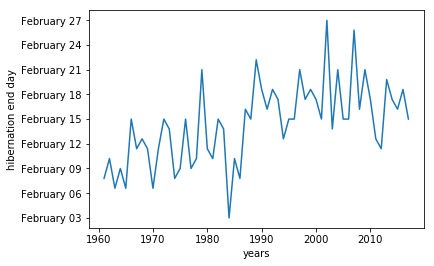

In [9]:
phi = 35.6666666
l = 4
avg_temp = []
days = 0
accumulated_avg_temp = 0
p = range(0, 57)

for k in p:
    for i in sakura_df[sakura_df.year == sakura_years[k]].serial:
        if (sakura_df.get_value(i, 'month') == 4):
            break

        temp = sakura_df.get_value(i, 'avg temp')
        accumulated_avg_temp = accumulated_avg_temp + temp
        days = days + 1

    meantemp_pyear = accumulated_avg_temp/float(days)
    avg_temp.append(meantemp_pyear)
    accumulated_avg_temp = 0
    days = 0

bloom_days = []
for k in p:
    Tf = avg_temp[k]
    dj = 136.75 - 7.689 * phi + 0.133 * phi * phi - 1.307 * (np.log(l)) + 0.144 * Tf + 0.285 * Tf * Tf
    bloom_days.append(int(dj))

d = []
k = range(0,27,3)
blossom_date = datetime.date(1960, 1, 31)
blossom_day = datetime.timedelta(days=3)
for i in k:
    blossom_date = blossom_date + blossom_day
    s = blossom_date.strftime("%B %d")
    d.append(s)

y_lbl = np.arange(35.0, 57.0, 2.5)

plt.plot(sakura_years, bloom_days)
plt.xlabel('years')
plt.ylabel('hibernation end day')
plt.yticks(y_lbl, d)
plt.show()

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, ...) in the equation for $t_{s}$. 


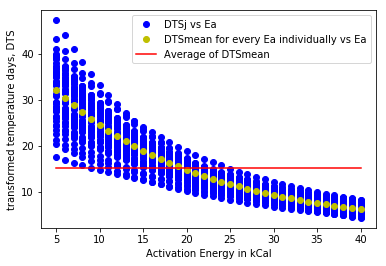

In [10]:
R = 8.314
Ts = 17 + 273
dict_bloom = dict((k, i) for (k, i) in zip(sakura_years, bloom_days))
for i in test_years:
    del dict_bloom[i]

train_hiber_end_days = list(dict_bloom.values())

p = range(0,52)
days = 31
train_bloom_days = []
for k in p:
    for i in train_df[train_df.year == train_years[k]].serial:
        days = days + 1
        if (train_df.get_value(i + 31, 'bloom') == 1):
            train_bloom_days.append(days)
            break
    days = 31

dts = 0
Ea = range(5, 41)
DTSj = []
count = 0

for r in Ea:
    for (m, j, k) in zip(p, train_bloom_days, train_hiber_end_days):
        for i in train_df[train_df.year == train_years[m]].serial:
            Tij = train_df.get_value(i + k - 1, 'avg temp') + 273
            dts = dts + np.exp((r * 4200 * (Tij - Ts)) / (R * Tij * Ts))
            count = count + 1
            if (count == (j - k + 1)):
                break

        DTSj.append(dts)
        dts = 0
        count = 0

DTSj1 = np.reshape(DTSj, (36, 52))
DTSj = np.reshape(DTSj, (36, 52)).T

DTSmean = []
for i in range(1, 52):
    plt.plot(Ea, DTSj[i], 'bo')

plt.plot(Ea, DTSj[0], 'bo', label='DTSj vs Ea')
for i in range(0, 36):
    DTSmean.append(np.mean(DTSj1[i]))

DTSabsmean = np.mean(DTSmean)
avgDTSmean = np.ones(len(Ea)) * DTSabsmean

plt.plot(Ea, DTSmean, 'yo', label='DTSmean for every Ea individually vs Ea')
plt.plot(Ea, avgDTSmean, 'r', label='Average of DTSmean')
plt.xlabel('Activation Energy in kCal')
plt.ylabel('transformed temperature days, DTS')
plt.legend()
plt.show()

### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.

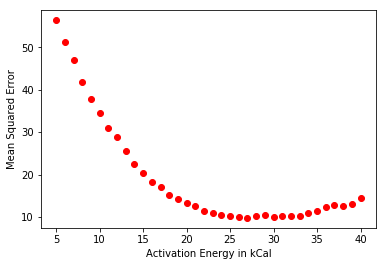

Optimal Ea according to mean squared error(MSE) =  27


In [11]:
mse = []
days_DTSmean = []
p = range(0,52)
dts = 0
count = 0

for r in Ea:
    for (m, j, k) in zip(p, train_bloom_days, train_hiber_end_days):
        for i in train_df[train_df.year == train_years[m]].serial:
            Tij = train_df.get_value(i + k - 1, 'avg temp') + 273
            dts = dts + np.exp((r * 4200 * (Tij - Ts)) / (R * Tij * Ts))
            count = count + 1
            if (dts > DTSmean[r-5]):
                break
            if((i + k -1) == 20543):
                break

        days_passed = k + count - 1
        days_DTSmean.append(days_passed)
        dts = 0
        count = 0
    mse_value = metrics.mean_squared_error(train_bloom_days, days_DTSmean)
    mse.append(mse_value)
    del days_DTSmean[:]

plt.plot(Ea, mse, 'ro')
plt.xlabel('Activation Energy in kCal')
plt.ylabel('Mean Squared Error')
plt.show()

dict_mse = dict((k, i) for (k, i) in zip(Ea, mse))
best_Ea = min(dict_mse, key=dict_mse.get)
print('Optimal Ea according to mean squared error(MSE) = ', best_Ea)

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

In [12]:
dict_bloom = dict((k, i) for (k, i) in zip(sakura_years, bloom_days))
for i in train_years:
    del dict_bloom[i]

test_hiber_end_days = list(dict_bloom.values())

days_DTSmean_test_best = []
p = range(0, 5)
dts = 0
count = 0

for (m, k) in zip(p, test_hiber_end_days):
    for i in test_df[test_df.year == test_years[m]].serial:
        Tij = test_df.get_value(i + k - 1, 'avg temp') + 273
        dts = dts + np.exp((best_Ea * 4200 * (Tij - Ts)) / (R * Tij * Ts))
        count = count + 1
        if (dts > DTSmean[best_Ea-5]):
            break

    days_passed = k + count - 1
    days_DTSmean_test_best.append(days_passed)
    dts = 0
    count = 0
r2_Ea = metrics.r2_score(days_true, days_DTSmean_test_best)

print('Sakura blooming dates for test years using optimal Ea(27 kCal): ', days_DTSmean_test_best)
print('True sakura blooming dates for test years                     : ', days_true)
print('R2 score for this model = ', r2_Ea)

Sakura blooming dates for test years using optimal Ea(27 kCal):  [80, 88, 91, 91, 83]
True sakura blooming dates for test years                     :  [79, 89, 93, 90, 82]
R2 score for this model =  0.941690962099


### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

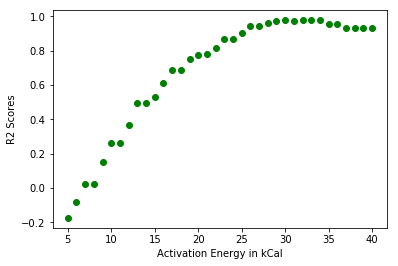

Best Ea according to R2 Score =  30
R2 score using this Ea(30 kCal) =  0.978134110787
Sakura blooming dates for test years using Ea = 30 kCal:  [79, 88, 92, 91, 82]
True sakura blooming dates for test years              :  [79, 89, 93, 90, 82]


In [13]:
days_DTSmean_test = []
p = range(0, 5)
dts = 0
count = 0
r2 = []

for r in Ea:
    for (m, k) in zip(p, test_hiber_end_days):
        for i in test_df[test_df.year == test_years[m]].serial:
            Tij = test_df.get_value(i + k - 1, 'avg temp') + 273
            dts = dts + np.exp((r * 4200 * (Tij - Ts)) / (R * Tij * Ts))
            count = count + 1
            if (dts > DTSmean[r-5]):
                break

        days_passed = k + count - 1
        days_DTSmean_test.append(days_passed)
        dts = 0
        count = 0
    r2_Ea = metrics.r2_score(days_true, days_DTSmean_test)
    r2.append(r2_Ea)
    del days_DTSmean_test[:]

plt.plot(Ea, r2, 'go')
plt.xlabel('Activation Energy in kCal')
plt.ylabel('R2 Scores')
plt.show()

dict_r2 = dict((k, i) for (k, i) in zip(Ea, r2))

best_Ea_r2 = max(dict_r2, key=dict_r2.get)
print('Best Ea according to R2 Score = ', best_Ea_r2)
max_r2 = max(dict_r2.values())
print('R2 score using this Ea(30 kCal) = ', max_r2)

##############
days_DTSmean_test_30 = []

for (m, k) in zip(p, test_hiber_end_days):
    for i in test_df[test_df.year == test_years[m]].serial:
        Tij = test_df.get_value(i + k - 1, 'avg temp') + 273
        dts = dts + np.exp((best_Ea_r2 * 4200 * (Tij - Ts)) / (R * Tij * Ts))
        count = count + 1
        if (dts > DTSmean[best_Ea_r2-5]):
            break

    days_passed = k + count - 1
    days_DTSmean_test_30.append(days_passed)
    dts = 0
    count = 0
print('Sakura blooming dates for test years using Ea = 30 kCal: ', days_DTSmean_test_30)
print('True sakura blooming dates for test years              : ', days_true)

As we can see from both the above figure and the discussion that, optimal Ea according to mean squared error(MSE) and R2 score 
are different. R2 score is the more reliable method for accuracy calculation in regression models like this. As we can see, using Ea = 30kCal, the R2 score was improved by approximately 3.5%. 


***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

In [14]:
import numpy as np
datanow = np.zeros(11)
train_data = []
p = range(0, 51)
count = 0

for m in p:
    for i in train_df[train_df.year == train_years[m]].serial:
        datanow[0] = datanow[0] + train_df.get_value(i, 'local pressure')
        datanow[1] = datanow[1] + train_df.get_value(i, 'sea pressure')
        datanow[2] = datanow[2] + train_df.get_value(i, 'total preci')
        datanow[3] = datanow[3] + train_df.get_value(i, 'hr1 preci')
        datanow[4] = datanow[4] + train_df.get_value(i, 'min10 preci')
        datanow[5] = datanow[5] + train_df.get_value(i, 'avg temp')
        datanow[6] = datanow[6] + train_df.get_value(i, 'max temp')
        datanow[7] = datanow[7] + train_df.get_value(i, 'min temp')
        datanow[8] = datanow[8] + train_df.get_value(i, 'avg humid')
        datanow[9] = datanow[9] + train_df.get_value(i, 'min humid')
        datanow[10] = datanow[10] + train_df.get_value(i, 'sun hours')

        count = count + 1
        if (count == 93):
            break
    #a = np.ones(len(datanow)) * 93
    #datanow1 = np.divide(datanow, a)
    train_data.append(datanow)
    datanow = np.zeros(11)
    count = 0
train_target = train_bloom_days[:-1]
print(train_data)
print(len(train_data))
datanow = np.zeros(11)
test_data = []
p = range(0, 5)
count = 0

for m in p:
    for i in test_df[test_df.year == test_years[m]].serial:
        datanow[0] = datanow[0] + test_df.get_value(i, 'local pressure')
        datanow[1] = datanow[1] + test_df.get_value(i, 'sea pressure')
        datanow[2] = datanow[2] + test_df.get_value(i, 'total preci')
        datanow[3] = datanow[3] + test_df.get_value(i, 'hr1 preci')
        datanow[4] = datanow[4] + test_df.get_value(i, 'min10 preci')
        datanow[5] = datanow[5] + test_df.get_value(i, 'avg temp')
        datanow[6] = datanow[6] + test_df.get_value(i, 'max temp')
        datanow[7] = datanow[7] + test_df.get_value(i, 'min temp')
        datanow[8] = datanow[8] + test_df.get_value(i, 'avg humid')
        datanow[9] = datanow[9] + test_df.get_value(i, 'min humid')
        datanow[10] = datanow[10] + test_df.get_value(i, 'sun hours')

        count = count + 1
        if (count == 93):
            break

    #a = np.ones(len(datanow)) * 93
    #datanow1 = np.divide(datanow, a)
    test_data.append(datanow)
    datanow = np.zeros(11)
    count = 0

test_target = days_true

[array([  9.43662000e+04,   9.44330000e+04,   1.94200000e+02,
         5.77000000e+01,   1.68000000e+01,   5.32000000e+02,
         1.03680000e+03,   1.11000000e+02,   5.10700000e+03,
         3.16800000e+03,   5.90800000e+02]), array([  9.41193000e+04,   9.41857000e+04,   1.43100000e+02,
         3.86000000e+01,   1.27000000e+01,   6.01800000e+02,
         1.10880000e+03,   1.30400000e+02,   4.97500000e+03,
         3.00900000e+03,   6.11100000e+02]), array([  9.39794000e+04,   9.40461000e+04,   1.08200000e+02,
         2.95000000e+01,   8.60000000e+00,   5.07400000e+02,
         1.02160000e+03,   4.51000000e+01,   4.76200000e+03,
         2.71000000e+03,   6.58700000e+02]), array([  9.45972000e+04,   9.46641000e+04,   3.08300000e+02,
         8.24000000e+01,   2.02000000e+01,   5.56000000e+02,
         9.76000000e+02,   1.87800000e+02,   5.37500000e+03,
         3.59700000e+03,   4.93400000e+02]), array([  9.38842000e+04,   9.42947000e+04,   1.14500000e+02,
         4.30000000e+01,  

The train data, tain target, test data and test target was created for using in neural network. Both the train and test data is comprised of sum of all the features provided in the .csv file for every years upto 93 days. This day count of 93 gives the best possible result, which was determined by trial and error. Getting the mean of the features was also tried, but it didn't change the result significantly, so it was not pursued later. The train and test targets are day count of Sakura bloom dates from January 1 of the respective year. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [17]:
scaler = StandardScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

All the train and test data was scaled because scaled data works better with neural network models.

In [18]:
mlp = MLPRegressor(max_iter = 200, solver='lbfgs', hidden_layer_sizes = (50, 50), activation='identity')
sfs = SFS(mlp,
          k_features=3,
          forward=True,
          floating=False,
          scoring='r2',
          cv=10)

sfs = sfs.fit(train_data_scaled, train_target)

print('best feature columns:', sfs.k_feature_idx_)

train_sfs = sfs.transform(train_data_scaled)
test_sfs = sfs.transform(test_data_scaled)

acc_train = 0
acc_test = 0
for i in range(0, 100):
    mlp.fit(train_sfs, train_target)

    acc_train = acc_train + mlp.score(train_sfs, train_target)
    acc_test = acc_test + mlp.score(test_sfs, test_target)

print('R2 score using this neural network model for test years  = ', acc_test/100)
print('R2 score using this neural network model for train years = ', acc_train/100)
mlp_days = mlp.predict(test_sfs)
print('Sakura blooming dates using this neural network model for test years: ', mlp_days.astype(int).tolist())
print('True sakura blooming dates for test years                           : ', days_true)

best feature columns: (4, 5, 7)
R2 score using this neural network model for test years  =  0.893683118988
R2 score using this neural network model for train years =  0.651004229533
Sakura blooming dates using this neural network model for test years:  [79, 89, 94, 86, 81]
True sakura blooming dates for test years                           :  [79, 89, 93, 90, 82]


The feature_selection module from mlxtend was used to determine which features work best for our neural network model and the best 3 features were chosen to be finally provide as input to our model. The best 3 features are: 'min10 preci', 'avg temp', 'min temp'. The choice of taking 3 as the feature number was also made by trial and error process. We used Multi Layer Perceptron Regression as the algorithm to run our model.

### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.

R2 score using Tmean                                                 =  0.832361516035
R2 score using 600C                                                  =  0.679300291545
R2 score for DTS method using optimal Ea(27 kCal) according to MSE   =  0.934402332362
R2 score for DTS method using best Ea(30 kCal) according to R2 Score =  0.978134110787
R2 score using neural network                                        =  0.893682800355


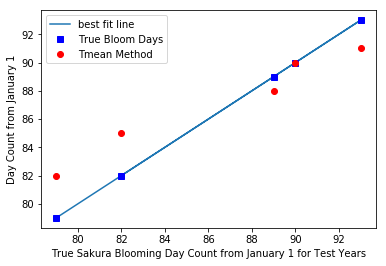

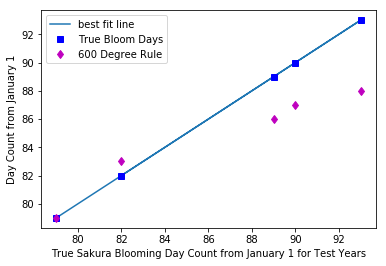

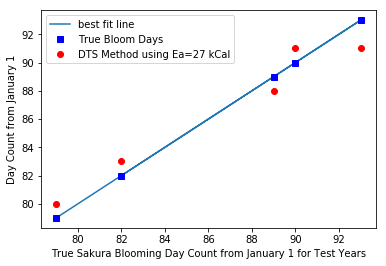

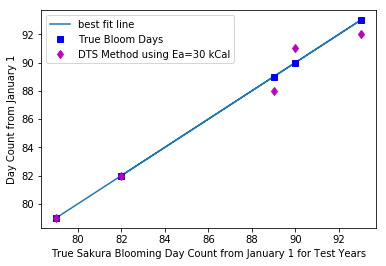

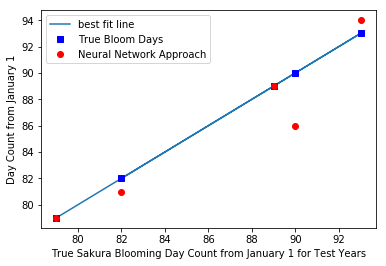

In [70]:
print('R2 score using Tmean                                                 = ', r2_tmean)
print('R2 score using 600C                                                  = ', r2_sixhundred)
print('R2 score for DTS method using optimal Ea(27 kCal) according to MSE   = ', r2_Ea)
print('R2 score for DTS method using best Ea(30 kCal) according to R2 Score = ', max_r2)
print('R2 score using neural network                                        = ', acc_test/100)

plt.plot(days_true, days_true, label = 'best fit line')
plt.plot(days_true, days_true, 'bs', label = 'True Bloom Days')
plt.plot(days_true, days_tmean, 'ro', label = 'Tmean Method')
plt.xlabel('True Sakura Blooming Day Count from January 1 for Test Years')
plt.ylabel('Day Count from January 1')
plt.legend()
plt.show()

plt.plot(days_true, days_true, label = 'best fit line')
plt.plot(days_true, days_true, 'bs', label = 'True Bloom Days')
plt.plot(days_true, days_sixhundred, 'md', label = '600 Degree Rule')
plt.xlabel('True Sakura Blooming Day Count from January 1 for Test Years')
plt.ylabel('Day Count from January 1')
plt.legend()
plt.show()

plt.plot(days_true, days_true, label = 'best fit line')
plt.plot(days_true, days_true, 'bs', label = 'True Bloom Days')
plt.plot(days_true, days_DTSmean_test_best, 'ro', label = 'DTS Method using Ea=27 kCal')
plt.xlabel('True Sakura Blooming Day Count from January 1 for Test Years')
plt.ylabel('Day Count from January 1')
plt.legend()
plt.show()

plt.plot(days_true, days_true, label = 'best fit line')
plt.plot(days_true, days_true, 'bs', label = 'True Bloom Days')
plt.plot(days_true, days_DTSmean_test_30, 'md', label = 'DTS Method using Ea=30 kCal')
plt.xlabel('True Sakura Blooming Day Count from January 1 for Test Years')
plt.ylabel('Day Count from January 1')
plt.legend()
plt.show()

plt.plot(days_true, days_true, label = 'best fit line')
plt.plot(days_true, days_true, 'bs', label = 'True Bloom Days')
plt.plot(days_true, mlp_days.astype(int).tolist(), 'ro', label = 'Neural Network Approach')
plt.xlabel('True Sakura Blooming Day Count from January 1 for Test Years')
plt.ylabel('Day Count from January 1')
plt.legend()
plt.show()

As we can see from the R2 scores as well as the output graphs, we can see that among the 3 methods applied, the DTS method works best and provides near perfect result. The neural network method also works quite well. But the fact that, we took a day count of 93 days randomly for accumulating the features as output hinders it performance a lot.

In [71]:
datanow = np.zeros(11)
train_data = []
p = range(0, 51)
count = 0

for m in p:
    for i in train_df[train_df.year == train_years[m]].serial:
        datanow[0] = datanow[0] + train_df.get_value(i, 'local pressure')
        datanow[1] = datanow[1] + train_df.get_value(i, 'sea pressure')
        datanow[2] = datanow[2] + train_df.get_value(i, 'total preci')
        datanow[3] = datanow[3] + train_df.get_value(i, 'hr1 preci')
        datanow[4] = datanow[4] + train_df.get_value(i, 'min10 preci')
        datanow[5] = datanow[5] + train_df.get_value(i, 'avg temp')
        datanow[6] = datanow[6] + train_df.get_value(i, 'max temp')
        datanow[7] = datanow[7] + train_df.get_value(i, 'min temp')
        datanow[8] = datanow[8] + train_df.get_value(i, 'avg humid')
        datanow[9] = datanow[9] + train_df.get_value(i, 'min humid')
        datanow[10] = datanow[10] + train_df.get_value(i, 'sun hours')

        count = count + 1
        if (count == train_bloom_days[m]):
            break
    #a = np.ones(len(datanow)) * 93
    #datanow1 = np.divide(datanow, a)
    train_data.append(datanow)
    datanow = np.zeros(11)
    count = 0

train_target = train_bloom_days[:-1]


datanow = np.zeros(11)
test_data = []
p = range(0, 5)
count = 0

for m in p:
    for i in test_df[test_df.year == test_years[m]].serial:
        datanow[0] = datanow[0] + test_df.get_value(i, 'local pressure')
        datanow[1] = datanow[1] + test_df.get_value(i, 'sea pressure')
        datanow[2] = datanow[2] + test_df.get_value(i, 'total preci')
        datanow[3] = datanow[3] + test_df.get_value(i, 'hr1 preci')
        datanow[4] = datanow[4] + test_df.get_value(i, 'min10 preci')
        datanow[5] = datanow[5] + test_df.get_value(i, 'avg temp')
        datanow[6] = datanow[6] + test_df.get_value(i, 'max temp')
        datanow[7] = datanow[7] + test_df.get_value(i, 'min temp')
        datanow[8] = datanow[8] + test_df.get_value(i, 'avg humid')
        datanow[9] = datanow[9] + test_df.get_value(i, 'min humid')
        datanow[10] = datanow[10] + test_df.get_value(i, 'sun hours')

        count = count + 1
        if (count == days_true[m]):
            break

    #a = np.ones(len(datanow)) * 93
    #datanow1 = np.divide(datanow, a)
    test_data.append(datanow)
    datanow = np.zeros(11)
    count = 0

test_target = days_true

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

In [83]:
mlp = MLPRegressor(max_iter = 200, solver='lbfgs', hidden_layer_sizes = (50, 50), activation='identity')
sfs = SFS(mlp,
          k_features=3,
          forward=True,
          floating=False,
          scoring='r2',
          cv=10)

sfs = sfs.fit(train_data_scaled, train_target)

print('best feature columns:', sfs.k_feature_idx_)

train_sfs = sfs.transform(train_data_scaled)
test_sfs = sfs.transform(test_data_scaled)

acc_train = 0
acc_test = 0
for i in range(0, 100):
    mlp.fit(train_sfs, train_target)

    acc_train = acc_train + mlp.score(train_sfs, train_target)
    acc_test = acc_test + mlp.score(test_sfs, test_target)

print('R2 score using this neural network model for test years  = ', acc_test/100)
print('R2 score using this neural network model for train years = ', acc_train/100)
mlp_days = mlp.predict(test_sfs)
print('Sakura blooming dates using this neural network model for test years: ', mlp_days.astype(int).tolist())
print('True sakura blooming dates for test years                           : ', days_true)

best feature columns: (1, 7, 10)
R2 score using this neural network model for test years  =  0.987242989157
R2 score using this neural network model for train years =  0.999734923065
Sakura blooming dates using this neural network model for test years:  [77, 89, 93, 90, 81]
True sakura blooming dates for test years                           :  [79, 89, 93, 90, 82]


   As we see from the above code snippets, if we hack and change the day count for both train and test years from random 93 days to their actual bloom days, the most important 3 features become 'sea pressure', 'min temp' and 'sun hours'. Also the R2 scores for both train and test data are close to 1, as evident also from the day count data.
   To conclude, we can say that, with more correct model structure with TensorFlow or Keras, we can drastically improve the result and neural networks can almost perfectly predict the Sakura Blooming Date.

***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

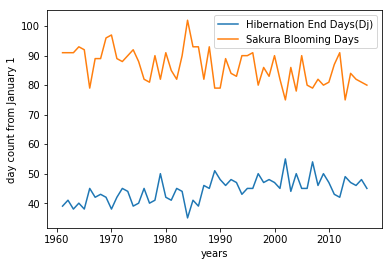

In [73]:
p = range(0,57)
days = 31
blossom_days = []
for k in p:
    for i in sakura_df[sakura_df.year == sakura_years[k]].serial:
        days = days + 1
        if (sakura_df.get_value(i + 31, 'bloom') == 1):
            blossom_days.append(days)
            break
    days = 31
    
plt.plot(sakura_years, bloom_days, label = 'Hibernation End Days(Dj)')
plt.plot(sakura_years, blossom_days, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.ylabel('day count from January 1')
plt.legend()
plt.show()

As we can see from the figure above, the hibernation end day counts in recent years is getting longer but the blooming days are getting shorter. This can be correlated to the fact that, due to global warming, the buds get plenty of sun hours and their growth phase is much shorter than before. It was also seen before that, accumulated sun hours duration upto bloom days is an important feature for our neural network model and our assumption based on this trend shown above matches with our findings.

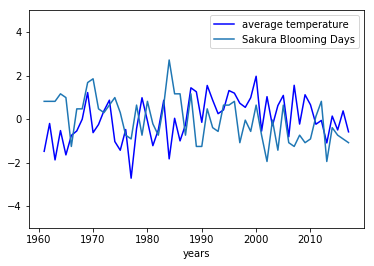

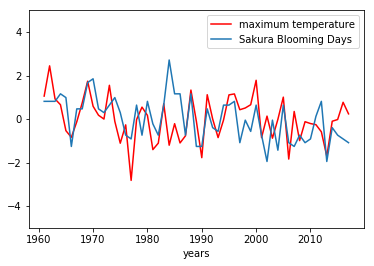

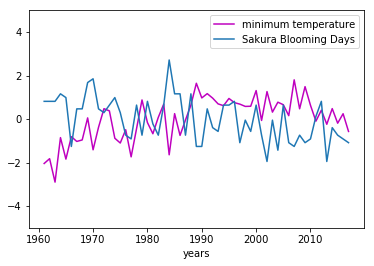

In [74]:
p = range(0, 57)
count = 0
avg_temp = []
max_temp = []
min_temp = []
datanow = np.zeros(3)

for m in p:
    for i in sakura_df[sakura_df.year == sakura_years[m]].serial:
        datanow[0] = datanow[0] + sakura_df.get_value(i, 'avg temp')
        datanow[1] = datanow[1] + sakura_df.get_value(i, 'max temp')
        datanow[2] = datanow[2] + sakura_df.get_value(i, 'min temp')

        count = count + 1
        if (count == blossom_days[m]):
            break

    avg_temp.append(datanow[0])
    max_temp.append(datanow[1])
    min_temp.append(datanow[2])
    datanow = np.zeros(3)
    count = 0

blossom_days_scaled = scaler.fit_transform(blossom_days)    
avg_temp_scaled = scaler.fit_transform(avg_temp)
max_temp_scaled = scaler.fit_transform(max_temp)
min_temp_scaled = scaler.fit_transform(min_temp)

plt.plot(sakura_years, avg_temp_scaled, 'b', label = 'average temperature')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, max_temp_scaled, 'r', label = 'maximum temperature')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, min_temp_scaled, 'm', label = 'minimum temperature')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()


As we an see from the figures above, the only definite trend noticable is that, the minimum temperature has increased in recent years. The average temperature seems to have the best correlation among these 3 with Sakura blooming dates. From the feature_importance function of mlxtend, it was seen that the temperature related features were the most important ones for predicting bloom dates, which is also true from a biological point of view.

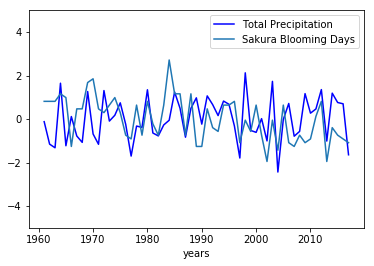

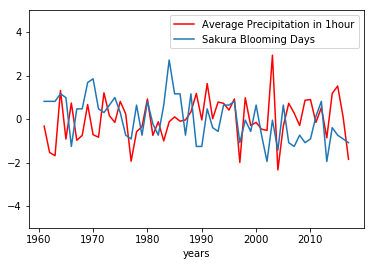

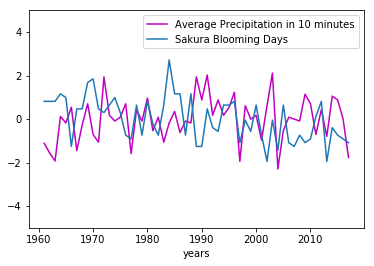

In [75]:
p = range(0, 57)
count = 0
total_preci = []
hr1_preci = []
min10_preci = []
datanow = np.zeros(3)

for m in p:
    for i in sakura_df[sakura_df.year == sakura_years[m]].serial:
        datanow[0] = datanow[0] + sakura_df.get_value(i, 'total preci')
        datanow[1] = datanow[1] + sakura_df.get_value(i, 'hr1 preci')
        datanow[2] = datanow[2] + sakura_df.get_value(i, 'min10 preci')

        count = count + 1
        if (count == blossom_days[m]):
            break

    total_preci.append(datanow[0])
    hr1_preci.append(datanow[1])
    min10_preci.append(datanow[2])
    datanow = np.zeros(3)
    count = 0
    
total_preci_scaled = scaler.fit_transform(total_preci)
hr1_preci_scaled = scaler.fit_transform(hr1_preci)
min10_preci_scaled = scaler.fit_transform(min10_preci)

plt.plot(sakura_years, total_preci_scaled, 'b', label = 'Total Precipitation')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, hr1_preci_scaled, 'r', label = 'Average Precipitation in 1hour')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, min10_preci_scaled, 'm', label = 'Average Precipitation in 10 minutes')
plt.plot(sakura_years, blossom_days_scaled, label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,5])
plt.show()


Total Precipitation has a high correlation with blooming dates every year, as evident from the first graph.

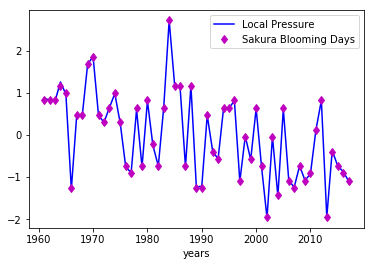

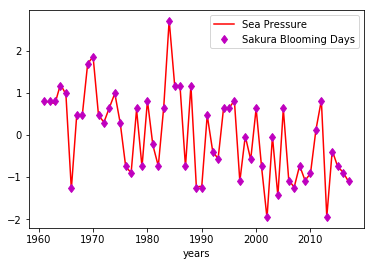

In [81]:
p = range(0, 57)
count = 0
local_pre = []
sea_pre = []
datanow = np.zeros(2)

for m in p:
    for i in sakura_df[sakura_df.year == sakura_years[m]].serial:
        datanow[0] = datanow[0] + sakura_df.get_value(i, 'local pressure')
        datanow[1] = datanow[1] + sakura_df.get_value(i, 'sea pressure')
        
        count = count + 1
        if (count == blossom_days[m]):
            break

    local_pre.append(datanow[0])
    sea_pre.append(datanow[1])
    datanow = np.zeros(2)
    count = 0
    
local_pre_scaled = scaler.fit_transform(local_pre)
sea_pre_scaled = scaler.fit_transform(sea_pre)

plt.plot(sakura_years, local_pre_scaled, 'b', label = 'Local Pressure')
plt.plot(sakura_years, blossom_days_scaled, 'md', label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, sea_pre_scaled, 'r', label = 'Sea Pressure')
plt.plot(sakura_years, blossom_days_scaled, 'md', label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-5,5])
plt.show()

As we can see from the above figures, pressure related features seem to have the best correlations with bloom dates. This assumption is also proved, when the feature_importance module of mlxtend returns sea pressure as the most important feature for predicting bloom dates. And only accumulating the sea pressure values upto bloom dates, if we create our train and test data, the neural network model that we used, returns a score of 0.98 test R2 score. So, it can safely be assumed that, these 2 features are very important for predicting bloom dates.

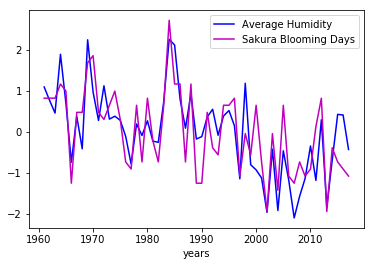

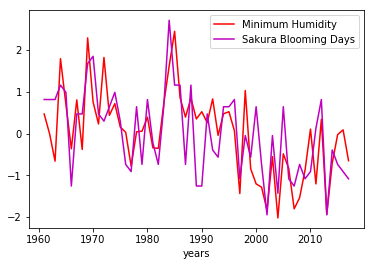

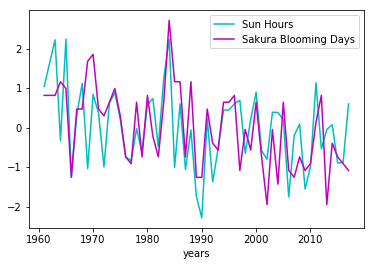

In [85]:
p = range(0, 57)
count = 0
avg_humid = []
min_humid = []
sun_hours = []
datanow = np.zeros(3)

for m in p:
    for i in sakura_df[sakura_df.year == sakura_years[m]].serial:
        datanow[0] = datanow[0] + sakura_df.get_value(i, 'avg humid')
        datanow[1] = datanow[1] + sakura_df.get_value(i, 'min humid')
        datanow[2] = datanow[2] + sakura_df.get_value(i, 'sun hours')

        count = count + 1
        if (count == blossom_days[m]):
            break

    avg_humid.append(datanow[0])
    min_humid.append(datanow[1])
    sun_hours.append(datanow[2])
    datanow = np.zeros(3)
    count = 0
    
avg_humid_scaled = scaler.fit_transform(avg_humid)
min_humid_scaled = scaler.fit_transform(min_humid)
sun_hours_scaled = scaler.fit_transform(sun_hours)

plt.plot(sakura_years, avg_humid_scaled, 'b', label = 'Average Humidity')
plt.plot(sakura_years, blossom_days_scaled, 'm', label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, min_humid_scaled, 'r', label = 'Minimum Humidity')
plt.plot(sakura_years, blossom_days_scaled, 'm', label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-5,5])
plt.show()

plt.plot(sakura_years, sun_hours_scaled, 'c', label = 'Sun Hours')
plt.plot(sakura_years, blossom_days_scaled, 'm', label = 'Sakura Blooming Days')
plt.xlabel('years')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-5,5])
plt.show()

As we can see from the above figures, there doesn't seem to be any definite realtions among these 3 features with bloom dates. 

To conclude, it can be said that, pressure and temperature related features are the most important ones to predict Sakura blooming dates.